In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter = "r" for columns ['airmass', 'fieldRA', 'fieldDec']
Found 515172 visits
Running:  ['maxairmassSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r"" constraint now.
monopole: 1.47182  dipole: lon: -8.14466, lat: 76.5121, amp: 0.310082
Plotting complete.


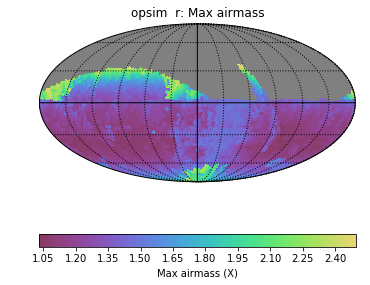

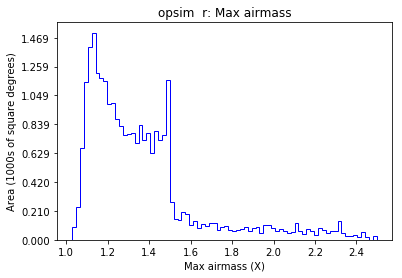

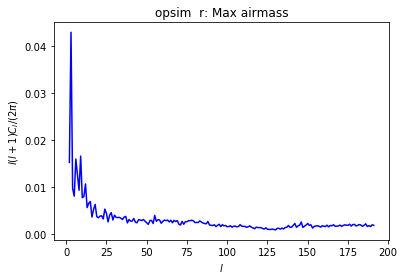

In [4]:
# Run a metric

# metric, slicer, constraint
metric = metrics.MaxMetric('airmass')
slicer = slicers.HealpixSlicer(nside = 64)
sqlconstraint = 'filter = "r"'

# bundle
maxairmassSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'maxairmassSky':maxairmassSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)

## learn to write a python class

In [27]:
class Car():
    def __init__(self,brand,**kwargs):
        self.brand = brand
        self.kwargs = kwargs
        
    def get_brand(self):
        return self.brand
    
    def get_prams(self):
        return self.kwargs
      

In [28]:
newCar = Car('BMW',price=10000)

In [29]:
newCar.get_brand()

'BMW'

In [42]:
newCar.kwargs

{'price': 10000}

In [43]:
newCar.kwargs['price']

10000

### Inherit a class

In [38]:
class SUV(Car):
    def __init__(self,brand,**kwargs):
        Car.__init__(self,brand,**kwargs)
    
    def sonFunc(self):
        print('son class works')
    

In [39]:
newSUV = SUV('Toyato', price=20000)

In [41]:
newSUV.get_brand()

'Toyato'

In [37]:
newSUV.get_prams()

{'price': 20000}

In [40]:
newSUV.sonFunc()

son class works


In [60]:
class Coupe(Car):
    def __init__(self, brand,**kwargs):
        #super().__init__(brand,**kwargs) # works in phthon 3 
        super(Coupe, self).__init__(brand,**kwargs)  # works in python 2/3
        
    def test(self):
        print('son class works')
        
    def __str__(self):
        # for print 
        return self.brand

In [58]:
newCoupe = Coupe('Maserati', price=30000)

In [54]:
newCoupe.brand

'Maserati'

In [55]:
newCoupe.test()

son class works


In [59]:
print(newCoupe)

Maserati


### Write a new Metric class

In [62]:
# super class
help(metrics.BaseMetric)

Help on class BaseMetric in module lsst.sims.maf.metrics.baseMetric:

class BaseMetric(builtins.object)
 |  Base class for the metrics.
 |  Sets up some basic functionality for the MAF framework: after __init__ every metric will
 |  record the columns (and stackers) it requires into the column registry, and the metricName,
 |  metricDtype, and units for the metric will be set.
 |  
 |  Parameters
 |  ----------
 |  col : str or list
 |      Names of the data columns that the metric will use.
 |      The columns required for each metric is tracked in the ColRegistry, and used to retrieve data
 |      from the opsim database. Can be a single string or a list.
 |  metricName : str
 |      Name to use for the metric (optional - if not set, will be derived).
 |  maps : list of lsst.sims.maf.maps objects
 |      The maps that the metric will need (passed from the slicer).
 |  units : str
 |      The units for the value returned by the metric (optional - if not set,
 |      will be derived fr

In [3]:
class newMetric(metrics.BaseMetric):
    def __init__(self, colname, **kwargs):
        self.colname = colname
        super().__init__(col=colname,**kwargs)
        
    def run(self, dataSlice, slicePoint=None):
        result = np.sum(dataSlice[self.colname])  # method used to calculate colume data, return a values for each slicepoint
        return result

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night<100 for columns ['fieldRA', 'fieldDec', 'airmass']
Found 8099 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<100" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 489 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 1.34322  dipole: lon: 49.9088, lat: -31.9589, amp: 9.0287
Plotting complete.


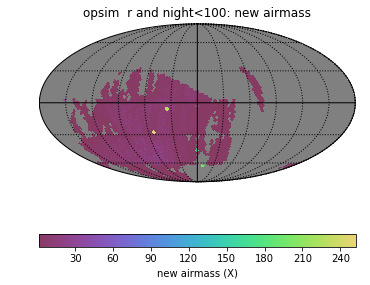

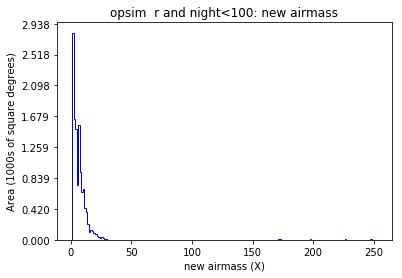

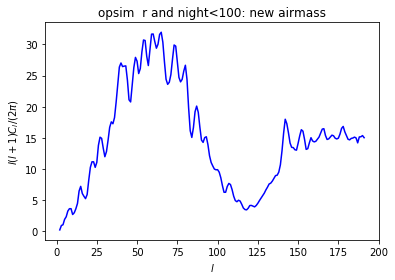

In [4]:
# Run the new metric

# metric, slicer, constraint
metric = newMetric('airmass')
slicer = slicers.HealpixSlicer(nside = 64)
sqlconstraint = 'filter = "r" and night<100'

# bundle
newMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'newMetricSky':newMetricSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


### Access and visulize the metric results

In [7]:
newMetricSky.metricValues

masked_array(data = [-- -- -- ..., -- -- --],
             mask = [ True  True  True ...,  True  True  True],
       fill_value = -1.6375e+30)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


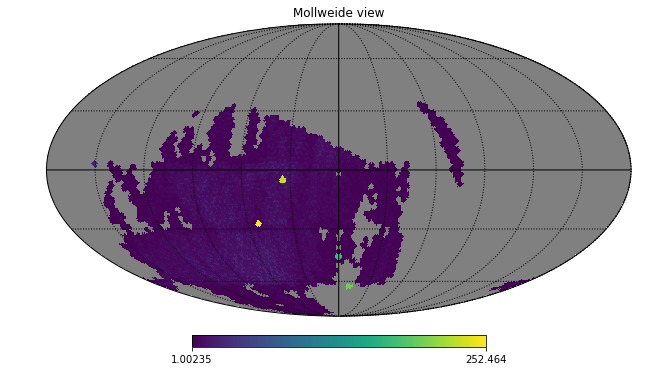

In [14]:
## use healpix to plot metricValues
import healpy as hp
sky = hp.mollview(newMetricSky.metricValues,nest=False)
hp.graticule()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


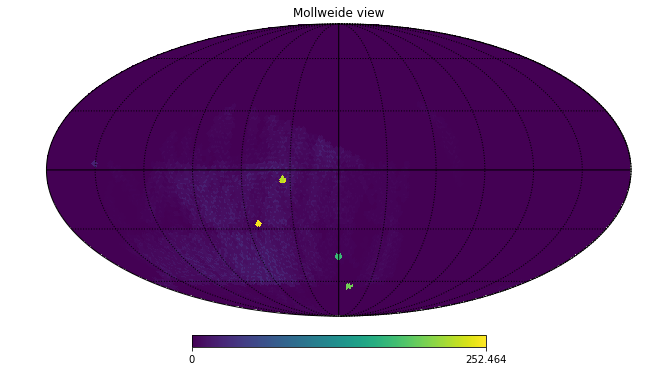

In [13]:
hp.mollview(newMetricSky.metricValues.data,nest=False)
hp.graticule()

(array([  7.99500000e+03,   4.55000000e+03,   1.35300000e+03,
          5.00000000e+02,   1.81000000e+02,   6.20000000e+01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.20000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   9.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
        

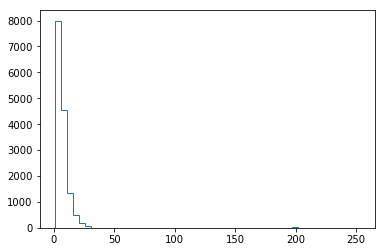

In [17]:
# plot histgram
import pandas as pd
metricData = pd.Series(newMetricSky.metricValues).dropna()
plt.hist(metricData,bins=50,histtype='step')

In [35]:
len(newMetricSky.metricValues)

49152

In [41]:
49152/256

192.0

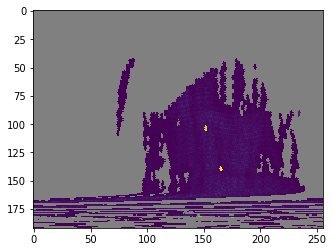

In [44]:
newValues = newMetricSky.metricValues.reshape((192,256))
plt.imshow(newValues)

Querying database SummaryAllProps with constraint filter = "r" and night<100 for columns ['fieldRA', 'fieldDec', 'airmass']
Found 8099 visits
Running:  ['pointSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<100" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/spatialPlotters.py:302: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))


Plotting complete.


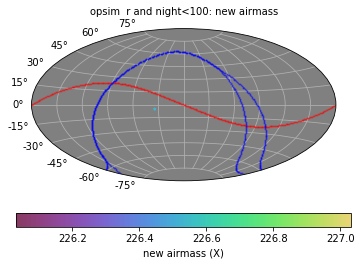

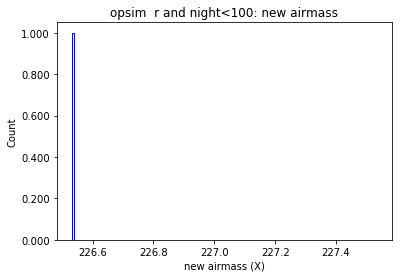

In [45]:
ra = np.array([34.39339593])
dec = np.array([-5.09032894])

# metric, slicer, constraint
metric = newMetric('airmass')
slicer = slicers.UserPointsSlicer(ra,dec)
sqlconstraint = 'filter = "r" and night<100'

# bundle
pointSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'pointSky':pointSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


In [46]:
pointSky.metricValues

masked_array(data = [226.53280426972862],
             mask = [False],
       fill_value = -666.0)

In [17]:
# write a new metric get airmass change over time
class AllNewpointMetric(metrics.BaseMetric):
    def __init__(self, colname, timeCol = 'expMJD', **kwargs):
        self.colname = colname
        self.timeCol = timeCol
        super().__init__(col=[self.colname,self.timeCol],metricDtype='object',**kwargs)  # metricDtype 
        
    def run(self, dataSlice, slicePoint=None):
        result = {'time':dataSlice[self.timeCol], self.colname:dataSlice[self.colname]} # method used to calculate colume data, return a values for each slicepoint
        return result

    

In [48]:
# Run the new metric
ra = np.array([34.39339593])
dec = np.array([-5.09032894])

# metric, slicer, constraint
metric = AllNewpointMetric(colname = 'skyBrightness', timeCol = 'observationStartMJD')
slicer = slicers.UserPointsSlicer(ra,dec)
sqlconstraint = 'filter = "r" and night<100'

# bundle
pointMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'pointMetricSky':pointMetricSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


Querying database SummaryAllProps with constraint filter = "r" and night<100 for columns ['skyBrightness', 'fieldRA', 'observationStartMJD', 'fieldDec']
Found 8099 visits
Running:  ['pointMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<100" constraint now.
Plotting complete.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


In [49]:
data = pointMetricSky.metricValues.data

In [50]:
time = data[0]['time'] # 0 is the index for the first point given in (ra,dec)
airmass = data[0]['skyBrightness']

In [51]:
time

array([ 59871.15483796,  59940.03836806,  59868.20380787,  59940.03878472,
        59929.04105324,  59929.04146991,  59929.04188657,  59929.04230324,
        59929.04271991,  59929.04313657,  59929.04355324,  59871.15275463,
        59940.03795139,  59882.1609375 ,  59882.16135417,  59926.03898148,
        59882.16177083,  59868.2033912 ,  59871.15233796,  59871.1519213 ,
        59929.04396991,  59868.20422454,  59940.03920139,  59871.15150463,
        59882.1621875 ,  59871.1531713 ,  59882.16260417,  59940.04295139,
        59868.20297454,  59868.20255787,  59882.16302083,  59871.15358796,
        59940.03961806,  59940.04003472,  59882.1634375 ,  59940.04545139,
        59940.04045139,  59882.16385417,  59940.04336806,  59871.15108796,
        59940.04086806,  59882.16427083,  59882.1646875 ,  59882.16510417,
        59871.1506713 ,  59882.16552083,  59882.1659375 ,  59923.05579861,
        59923.05538194,  59923.05496528,  59882.16635417,  59882.16677083,
        59882.1671875 ,  

In [35]:
len(airmass)

202

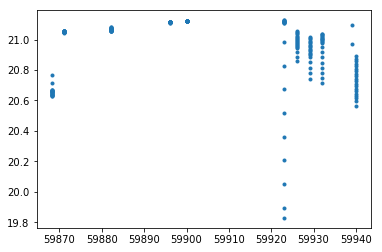

In [53]:
plt.plot(time[0:202],airmass[0:202],'.')

### UniSlicer

In [54]:
# metric, slicer, constraint
metric = AllNewpointMetric(colname = 'skyBrightness', timeCol = 'observationStartMJD')
slicer = slicers.UniSlicer()
sqlconstraint = 'filter = "r" and night<100'

# bundle
pointMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'pointMetricSky':pointMetricSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


Querying database SummaryAllProps with constraint filter = "r" and night<100 for columns ['skyBrightness', 'observationStartMJD']
Found 8099 visits
Running:  ['pointMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<100" constraint now.
Plotting complete.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/db/resultsDb.py:299: UserWarning: Warning! Cannot save summary statistic that is not a simple float or int
  warnings.warn('Warning! Cannot save summary statistic that is not a simple float or int')


In [55]:
pointMetricSky.metricValues

masked_array(data = [ {'time': array([ 59853.10606481,  59853.10648148,  59853.10689815, ...,
        59947.32219907,  59947.32261574,  59947.32303241]), 'skyBrightness': array([ 21.05307665,  21.05430503,  21.0555334 , ...,  21.03291993,
        21.0330417 ,  21.03310663])}],
             mask = [False],
       fill_value = -666)

In [56]:
data = pointMetricSky.metricValues.data

In [58]:
time = data[0]['time']

In [59]:
len(time)

8099

# Sql python

In [60]:
import sqlite3

In [62]:
connection = sqlite3.connect('obs5000.db')
cursor = connection.cursor()

In [87]:
sqlcommand = 'SELECT field4,field5 FROM Obs5000 WHERE field2<2'
cursor.execute(sqlcommand)
data = cursor.fetchall()

In [88]:
type(data)

list

In [89]:
data

[('59853.0167939815', '305.024754044124'),
 ('59853.0178009259', '305.388246537189'),
 ('59853.0198263889', '306.11940959629'),
 ('59853.0202777778', '306.28235450788'),
 ('59853.0207291667', '306.445299416844'),
 ('59853.0211805556', '306.608244328434'),
 ('59853.0216203704', '306.767011161798'),
 ('59853.0220717593', '306.929956073387'),
 ('59853.0236458333', '307.498174220901'),
 ('59853.0245949074', '307.840776341224'),
 ('59853.0250578704', '308.007899325785'),
 ('59853.0255092593', '308.17084423475'),
 ('59853.0259606481', '308.333789146339'),
 ('59853.026412037', '308.496734055302'),
 ('59853.026875', '308.66385704249'),
 ('59853.0273263889', '308.826801951453'),
 ('59853.0277777778', '308.989746863044'),
 ('59853.0282291667', '309.152691772007'),
 ('59853.0286921296', '309.31981475657'),
 ('59853.0291319444', '309.478581592559'),
 ('59853.0295949074', '309.645704577122'),
 ('59853.0300462963', '309.808649488712'),
 ('59853.0304976852', '309.971594397675'),
 ('59853.0309490741',

In [90]:
cursor.fetchone()